In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1.数据加载

因为原数据没有标题行，所以根据数据源的描述，在加载数据是添加了一行作为标题

In [2]:
names = ['User_ID', 'Item_ID', 'Category_ID', 'Behavior_type', 'Timestamp']
data_set= pd.read_csv(r'D:\Dataset\Goods-and-its-Category-data-from-Alibaba\UserBehavior.csv', names=names, nrows=10000000)

In [3]:
data_set.head()

,User_ID,Item_ID,Category_ID,Behavior_type,Timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146


In [4]:
data_set.describe()

,User_ID,Item_ID,Category_ID,Timestamp
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,3.151168e+05,2.579448e+06,2.706506e+06,1.511952e+09
std,1.976828e+05,1.487640e+06,1.464218e+06,6.058377e+06
min,1.000000e+00,3.000000e+00,1.147000e+03,-2.034497e+09
25%,1.773220e+05,1.295395e+06,1.338377e+06,1.511762e+09
50%,3.033830e+05,2.579668e+06,2.693696e+06,1.511965e+09
75%,4.289120e+05,3.861127e+06,4.145813e+06,1.512180e+09
max,1.018011e+06,5.163067e+06,5.162429e+06,2.122867e+09


timestamp列存在负值，属于脏数据，因为时间不可能为负，需要清理

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 5 columns):
User_ID          int64
Item_ID          int64
Category_ID      int64
Behavior_type    object
Timestamp        int64
dtypes: int64(4), object(1)
memory usage: 381.5+ MB


数据总共有19807536条，其中User_ID, Item_ID，Category_ID，Timestamp均为整数型数
据，Behavior_type为object类型

# 2.数据清洗

### 滤除缺失数据

In [6]:
data_set.isnull().any()

User_ID          False
Item_ID          False
Category_ID      False
Behavior_type    False
Timestamp        False
dtype: bool

通过函数可知，数据集中没有缺失数据，不需要去除缺失数据

### 移除重复数据

In [7]:
data_set.duplicated().sum()

5

In [8]:
data_set.drop_duplicates(inplace=True) 

In [9]:
data_set.count()

User_ID          9999995
Item_ID          9999995
Category_ID      9999995
Behavior_type    9999995
Timestamp        9999995
dtype: int64

原数据中含有5条重复数据，已去除

### 滤除不合理的数据

通过describe函数发现时间数据中存在负值，最大值也大于目前的时间。说明这个字段包含一些错误的数据，需要过滤掉

把Timestam格式的数据转化为datetime类型，以便于进行统计分析

In [10]:
data_set = data_set[data_set['Timestamp'] > 86399]

In [11]:
#  使用pd.to_datetime转化Timestamp时，由于时区问题，处理起来不方便，所以采用datetime模块来处理
# fromtimestamp函数的参数若为负值会报错（OSError: [Errno 22] Invalid argument），所以需要先去掉timestamp中的负值
# 在Python3.6版本中，0 <= t <= 86399时，也会报相同的错，属于BUG
data_set['Datetime'] = data_set['Timestamp'].apply(lambda unix_ts: datetime.fromtimestamp(unix_ts))

In [12]:
data_set.head()

,User_ID,Item_ID,Category_ID,Behavior_type,Timestamp,Datetime
0,1,2268318,2520377,pv,1511544070,2017-11-25 01:21:10
1,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33
2,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25
3,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53
4,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06


分割日期，便于统计分析

In [13]:
data_set['Date'] = data_set['Datetime'].dt.date

In [14]:
data_set['Date'].head()

0    2017-11-25
1    2017-11-25
2    2017-11-25
3    2017-11-25
4    2017-11-25
Name: Date, dtype: object

In [15]:
data_set['Hour'] = data_set['Datetime'].dt.hour

In [16]:
data_set.head()

,User_ID,Item_ID,Category_ID,Behavior_type,Timestamp,Datetime,Date,Hour
0,1,2268318,2520377,pv,1511544070,2017-11-25 01:21:10,2017-11-25,1
1,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33,2017-11-25,6
2,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25,2017-11-25,9
3,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53,2017-11-25,15
4,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06,2017-11-25,15


根据数据集的描述，该数据集包含了2017年11月25日至2017年12月3日之间的数据。所以，需要根据条件去除不符合条件的数据

In [17]:
data_set = data_set[(data_set['Datetime'] > datetime(2017, 11, 25)) & (data_set['Datetime'] < datetime(2017, 12, 4))]

In [18]:
data_set.count()

User_ID          9994422
Item_ID          9994422
Category_ID      9994422
Behavior_type    9994422
Timestamp        9994422
Datetime         9994422
Date             9994422
Hour             9994422
dtype: int64

In [19]:
data_set.head()

,User_ID,Item_ID,Category_ID,Behavior_type,Timestamp,Datetime,Date,Hour
0,1,2268318,2520377,pv,1511544070,2017-11-25 01:21:10,2017-11-25,1
1,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33,2017-11-25,6
2,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25,2017-11-25,9
3,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53,2017-11-25,15
4,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06,2017-11-25,15


# 3.数据分析

经过一系列的数据清洗，数据集已经可以用来进行数据分析了。

## 1.不同时间维度的用户行为分析

### 1.以天为单位的用户行为变化

以天为单位统计pv

In [20]:
daily_pv = data_set[data_set['Behavior_type'] == 'pv']['Date'].value_counts()
daily_pv

2017-12-02    1238785
2017-12-03    1225845
2017-12-01     972109
2017-11-26     952269
2017-11-25     931870
2017-11-30     929352
2017-11-29     913153
2017-11-27     897421
2017-11-28     883696
Name: Date, dtype: int64

重新按日期排序索引

In [21]:
daily_pv = daily_pv.sort_index()

In [22]:
daily_pv

2017-11-25     931870
2017-11-26     952269
2017-11-27     897421
2017-11-28     883696
2017-11-29     913153
2017-11-30     929352
2017-12-01     972109
2017-12-02    1238785
2017-12-03    1225845
Name: Date, dtype: int64

11月24日的日流量只有其他日期的十分之一，当日无特殊事件，所以可以判断当日数据不全，需要去除11月24日的数据

绘制日流量柱状图

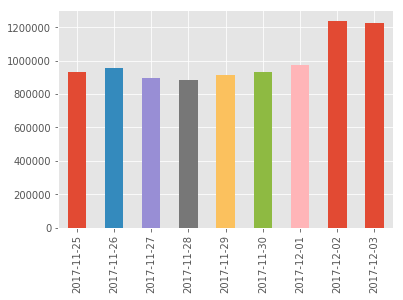

In [23]:
plt.style.use('ggplot')
daily_pv.plot.bar()
# plt.savefig('日流量柱状图.png',dpi=200, bbox_inches='tight')

从2017/11/25到2017/12/01期间，pv一直比较稳定，在2017/12/02和2017/12/03这两天有较明显的增长，2017/12/02这一天的增长率超过20%，考虑到2017/11/25和2017/11/26这两天同为周末，但是用户行为数量与平时并没有明显增长，所以推断，周末对用户行为带来的影响较小，而2017/12/02和2017/12/03这两天的增长，可能是因为平台的“双十二”预热活动带来的影响。

In [24]:
data_set.head()

,User_ID,Item_ID,Category_ID,Behavior_type,Timestamp,Datetime,Date,Hour
0,1,2268318,2520377,pv,1511544070,2017-11-25 01:21:10,2017-11-25,1
1,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33,2017-11-25,6
2,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25,2017-11-25,9
3,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53,2017-11-25,15
4,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06,2017-11-25,15


In [25]:
daily_data2 = data_set['User_ID'].groupby([data_set['Date'], data_set['Behavior_type']]).count()

In [26]:
daily_data = daily_data2.unstack()
daily_data

Behavior_type,buy,cart,fav,pv
Date,,,,
2017-11-25,19714,56278,30168,931870
2017-11-26,20210,59469,31281,952269
2017-11-27,22225,55010,29723,897421
2017-11-28,20996,54194,29002,883696
2017-11-29,21814,55802,30030,913153
2017-11-30,21731,56722,30469,929352
2017-12-01,20940,62885,31048,972109
2017-12-02,25866,80377,40210,1238785
2017-12-03,25642,78390,39726,1225845


c:\users\kilo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


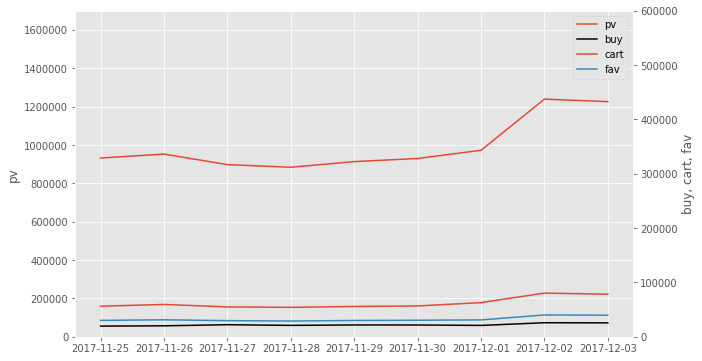

In [27]:
fig = plt.figure(figsize=(10,6))
ax1= fig.add_subplot(111)
ax1.plot(daily_data['pv'].index, daily_data['pv'])
ax2 = ax1.twinx()
ax2.plot(daily_data['buy'], color='k')
ax2.plot(daily_data['cart'])
ax2.plot(daily_data['fav'])
plt.grid(b=False)
ax1.set_ylim(0, 1700000)
ax1.set_ylabel('pv')
ax2.set_ylim(0, 600000)
ax2.set_ylabel('buy, cart, fav')
fig.legend(loc='best', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
# plt.savefig('用户行为对比柱状图.png',dpi=200, bbox_inches='tight')

从上表可以看出，用户购买，收藏和加入购车的行为与pv成正相关，同时用户购买，收藏和加入购车的行为数量在pv中占比极小

每日独立访客数（UV）统计

In [28]:
daily_uv = data_set[data_set['Behavior_type'] == 'pv']['User_ID'].groupby(data_set['Date']).nunique()
daily_uv

Date
2017-11-25    67984
2017-11-26    68900
2017-11-27    68153
2017-11-28    68157
2017-11-29    69191
2017-11-30    70249
2017-12-01    71071
2017-12-02    93023
2017-12-03    92804
Name: User_ID, dtype: int64

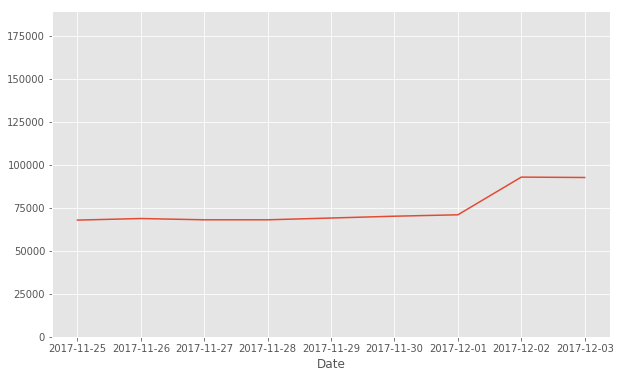

In [29]:
daily_uv.plot(figsize=(10, 6), ylim=(0,190000 ))

人均浏览页数

In [30]:
daily_pu = daily_pv/daily_uv

In [31]:
daily_pu

2017-11-25    13.707196
2017-11-26    13.821030
2017-11-27    13.167740
2017-11-28    12.965594
2017-11-29    13.197569
2017-11-30    13.229398
2017-12-01    13.677998
2017-12-02    13.316975
2017-12-03    13.208967
dtype: float64

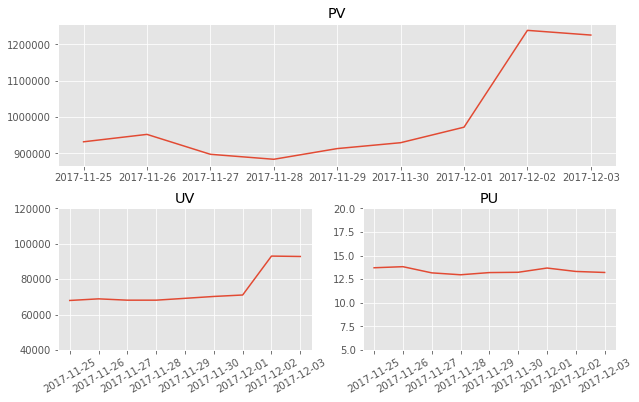

In [32]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
ax1.plot(daily_pv)
ax1.set_title('PV')
ax2.plot(daily_uv)
ax2.set_title('UV')
ax2.set_ylim(40000, 120000)
for tick in ax2.get_xticklabels():
    tick.set_rotation(30)
ax3.plot(daily_pu)
ax3.set_title('PU')
ax3.set_ylim(5, 20)
for tick in ax3.get_xticklabels():
    tick.set_rotation(30)
plt.subplots_adjust(hspace = 0.3)

从图中可以看出，用户日平均浏览页面数一直比较平稳，保持在13~14之间，而uv与pv成正相关关系，所以这段时间的PV的变化主要是由UV引起的

### 2.一天中的用户行为分析

In [33]:
hours_flow = data_set.groupby(['Behavior_type', 'Hour'])['Behavior_type'].count()
hours_flow

Behavior_type  Hour
buy            0         5503
               1         2158
               2         1192
               3          708
               4          610
               5          828
               6         1774
               7         3604
               8         6321
               9         9547
               10       12703
               11       12247
               12       11748
               13       12496
               14       12013
               15       12049
               16       11666
               17       10180
               18        9434
               19       11398
               20       13212
               21       14442
               22       13549
               23        9756
cart           0        18328
               1         8531
               2         4455
               3         3271
               4         2683
               5         3802
                        ...  
fav            18       13134
               19   

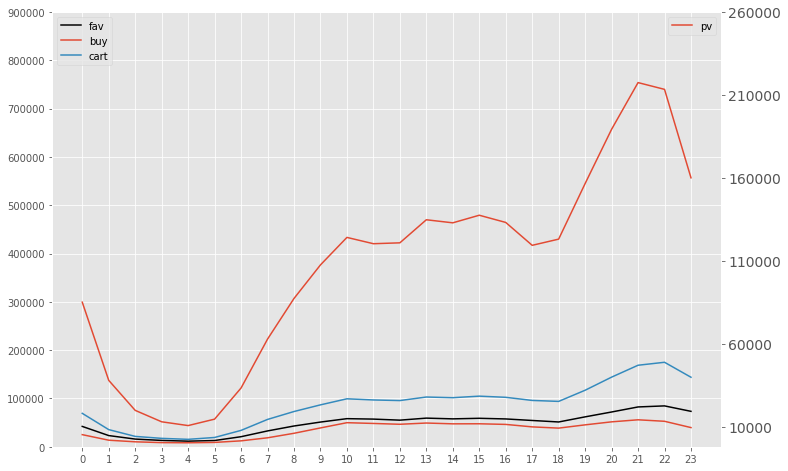

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(hours_flow['pv'], label='pv')
plt.xticks(hours_flow['pv'].index)
plt.yticks(range(0, 1000000, 100000))
plt.legend(loc='upper right')
plt.grid(axis = 1)
plt.twinx()
plt.plot(hours_flow['fav'], label='fav', color='k')
plt.plot(hours_flow['buy'], label='buy')
plt.plot(hours_flow['cart'], label='cart')
plt.legend(loc='upper left')
plt.yticks(range(10000, 310000, 50000), fontsize=14)
plt.grid(b=False)

从图中可以看出，四种用户行为的趋势几乎一致，呈正相关关系。用户活动主要集中在上午8点到晚上23点之间，且在晚上21点达到最高峰，凌晨0点到8点是用户活动最少的时间段。从时间段分布上来看，符合正常人的作息时间。
另外，我们可以看到用户活动在中午12点和晚上17点左右有一个明显的下降，因为这段时间是大多数人下班时间，一般人都在吃晚餐或者在下班回家的路上，没有时间进行购物活动。
根据用户的行为习惯，我们可以相应的在晚上19到23点期间推出营销活动，以吸引更多的人参加。

### 3.一周中的用户行为分析

In [35]:
data_set['Week_day'] = data_set['Datetime'].dt.day_name()

In [36]:
data_set.head()

,User_ID,Item_ID,Category_ID,Behavior_type,Timestamp,Datetime,Date,Hour,Week_day
0,1,2268318,2520377,pv,1511544070,2017-11-25 01:21:10,2017-11-25,1,Saturday
1,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33,2017-11-25,6,Saturday
2,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25,2017-11-25,9,Saturday
3,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53,2017-11-25,15,Saturday
4,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06,2017-11-25,15,Saturday


In [37]:
week_flow = data_set[data_set['Datetime'] >= '2017-11-27' ].groupby(['Behavior_type', 'Week_day'])['Behavior_type'].count()
week_flow

Behavior_type  Week_day 
buy            Friday         20940
               Monday         22225
               Saturday       25866
               Sunday         25642
               Thursday       21731
               Tuesday        20996
               Wednesday      21814
cart           Friday         62885
               Monday         55010
               Saturday       80377
               Sunday         78390
               Thursday       56722
               Tuesday        54194
               Wednesday      55802
fav            Friday         31048
               Monday         29723
               Saturday       40210
               Sunday         39726
               Thursday       30469
               Tuesday        29002
               Wednesday      30030
pv             Friday        972109
               Monday        897421
               Saturday     1238785
               Sunday       1225845
               Thursday      929352
               Tuesday       883696
   

In [38]:
week_flow = week_flow.unstack(level = 0)
week_flow = week_flow.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [39]:
week_flow

Behavior_type,buy,cart,fav,pv
Week_day,,,,
Monday,22225,55010,29723,897421
Tuesday,20996,54194,29002,883696
Wednesday,21814,55802,30030,913153
Thursday,21731,56722,30469,929352
Friday,20940,62885,31048,972109
Saturday,25866,80377,40210,1238785
Sunday,25642,78390,39726,1225845


([<matplotlib.axis.XTick at 0x22293cad2e8>,
 <a list of 7 Text xticklabel objects>)

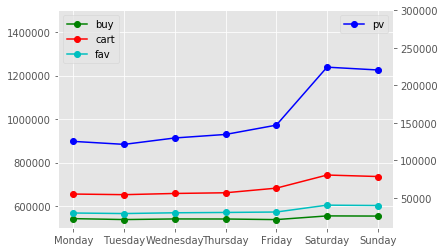

In [40]:
#  由于采用两条Y轴，所以需要重新制定颜色，防止颜色重复
plt.plot(week_flow['pv'], color='b', marker='o')
plt.ylim(500000, 1500000)
plt.legend(loc='upper right')
plt.twinx()
plt.plot(week_flow['buy'], color='g', marker='o')
plt.plot(week_flow['cart'], color='r', marker='o')
plt.plot(week_flow['fav'], color='c', marker='o')
plt.ylim(10000, 300000)
plt.legend(loc='upper left')
plt.grid(b=False)
plt.xticks(week_flow.index)

从图中可以看出，从周一到周五，用户的行为数量一直保持非常缓慢的增长，而且相对于周末，属于一个较低的水平。在周末，用户的行为数量达到近25%的增长，至于增长的原因已经在前面分析过了，主要是平台的推广活动造成的。

## 用户行为转化漏斗

In [41]:
daily_data

Behavior_type,buy,cart,fav,pv
Date,,,,
2017-11-25,19714,56278,30168,931870
2017-11-26,20210,59469,31281,952269
2017-11-27,22225,55010,29723,897421
2017-11-28,20996,54194,29002,883696
2017-11-29,21814,55802,30030,913153
2017-11-30,21731,56722,30469,929352
2017-12-01,20940,62885,31048,972109
2017-12-02,25866,80377,40210,1238785
2017-12-03,25642,78390,39726,1225845


In [42]:
daily_data['pv_to_cart_and_fav'] =round(100 * (daily_data['cart'] + daily_data['fav']) / daily_data['pv'], 2)

In [43]:
daily_data

Behavior_type,buy,cart,fav,pv,pv_to_cart_and_fav
Date,,,,,
2017-11-25,19714,56278,30168,931870,9.28
2017-11-26,20210,59469,31281,952269,9.53
2017-11-27,22225,55010,29723,897421,9.44
2017-11-28,20996,54194,29002,883696,9.41
2017-11-29,21814,55802,30030,913153,9.40
2017-11-30,21731,56722,30469,929352,9.38
2017-12-01,20940,62885,31048,972109,9.66
2017-12-02,25866,80377,40210,1238785,9.73
2017-12-03,25642,78390,39726,1225845,9.64


In [44]:
daily_data['pv_to_buy'] = round(100 * daily_data['buy'] / daily_data['pv'], 2)

In [45]:
daily_data

Behavior_type,buy,cart,fav,pv,pv_to_cart_and_fav,pv_to_buy
Date,,,,,,
2017-11-25,19714,56278,30168,931870,9.28,2.12
2017-11-26,20210,59469,31281,952269,9.53,2.12
2017-11-27,22225,55010,29723,897421,9.44,2.48
2017-11-28,20996,54194,29002,883696,9.41,2.38
2017-11-29,21814,55802,30030,913153,9.40,2.39
2017-11-30,21731,56722,30469,929352,9.38,2.34
2017-12-01,20940,62885,31048,972109,9.66,2.15
2017-12-02,25866,80377,40210,1238785,9.73,2.09
2017-12-03,25642,78390,39726,1225845,9.64,2.09


In [46]:
daily_data['pv_pct'] = 100 * daily_data['pv'] / daily_data['pv']

In [47]:
daily_data

Behavior_type,buy,cart,fav,pv,pv_to_cart_and_fav,pv_to_buy,pv_pct
Date,,,,,,,
2017-11-25,19714,56278,30168,931870,9.28,2.12,100.0
2017-11-26,20210,59469,31281,952269,9.53,2.12,100.0
2017-11-27,22225,55010,29723,897421,9.44,2.48,100.0
2017-11-28,20996,54194,29002,883696,9.41,2.38,100.0
2017-11-29,21814,55802,30030,913153,9.40,2.39,100.0
2017-11-30,21731,56722,30469,929352,9.38,2.34,100.0
2017-12-01,20940,62885,31048,972109,9.66,2.15,100.0
2017-12-02,25866,80377,40210,1238785,9.73,2.09,100.0
2017-12-03,25642,78390,39726,1225845,9.64,2.09,100.0


In [49]:
pv_to_buy = round(daily_data['buy'].sum() / daily_data['pv'].sum() * 100, 4) 
pv_to_buy

2.2263999999999999

In [50]:
pv_to_cart_and_fav =  round((daily_data['cart'].sum()  + daily_data['fav'].sum()) / daily_data['pv'].sum() * 100, 4)
pv_to_cart_and_fav

9.5117999999999991

In [51]:
daily_data['pv'].sum()

8944500

In [52]:
daily_data['cart'].sum()  + daily_data['fav'].sum()

850784

In [53]:
daily_data['buy'].sum()

199138

In [54]:
behavior_nums = [daily_data['pv'].sum(), daily_data['cart'].sum()  + daily_data['fav'].sum(), daily_data['buy'].sum()]
behavior_type = ['pv', 'pv_to_cart_and_fav', 'pv_to_buy']
behavior_nums 

[8944500, 850784, 199138]

In [55]:
data = [('pv', 100), ('pv_to_cart_and_fav', pv_to_cart_and_fav), ('pv_to_buy', pv_to_buy)]
data

[('pv', 100),
 ('pv_to_cart_and_fav', 9.5117999999999991),
 ('pv_to_buy', 2.2263999999999999)]

In [56]:
from pyecharts  import options as opts
from pyecharts.charts import Funnel, Page

In [63]:
b = (
        Funnel()
        .add(
                "", 
                data,
                tooltip_opts=opts.TooltipOpts(is_show=True, trigger="item", formatter="{b}:{c}%"),
                label_opts=opts.LabelOpts(is_show=True, formatter="{b}: {c}%")
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="用户行为转化漏斗"))
    )

In [64]:
b.render('用户行为转化漏斗.html')

'C:\\Users\\KILO\\DataAnalysis\\taobao_user_behavior_analysis\\用户行为转化漏斗.html'

In [66]:
b.render_notebook()

分析

## 新增用户分析

由于2017/11/25为数据开始日期，无法与 前一天数据进行比较，所以计算从2017/11/26开始的新增用户。计算方式为当天第一次出现用户行为的用户。

In [81]:
# 把Date列的数据类型由object转化为datetime, 便于筛选
data_set['Date'] = pd.to_datetime(data_set['Date'], format='%Y-%m-%d')

In [82]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994422 entries, 0 to 9999999
Data columns (total 9 columns):
User_ID          int64
Item_ID          int64
Category_ID      int64
Behavior_type    object
Timestamp        int64
Datetime         datetime64[ns]
Date             datetime64[ns]
Hour             int64
Week_day         object
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 1.1+ GB


In [88]:
new_user = data_set[data_set['Date'] == '2017-11-26']['User_ID'].isin(data_set[data_set['Date'] == '2017-11-25']['User_ID'])

In [96]:
new_user.count()

1063229

In [94]:
new_user.iloc[1]

True